In [58]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random


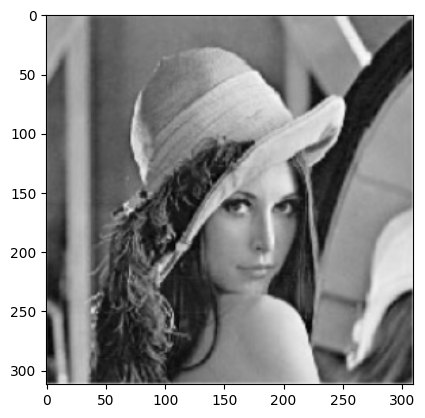

In [60]:
img = cv2.imread('../images/lena.jpg',0)
plt.imshow(img,cmap='gray')

In [40]:
def salt_pepper_noise(image):
   
    # Getting the dimensions of the image
    row , col = image.shape
      
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = 50000
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Color that pixel to white
        image[y_coord][x_coord] = 255
          
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    # number_of_pixels = random.randint(2000 , 3000)
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Color that pixel to black
        image[y_coord][x_coord] = 0
          
    return image

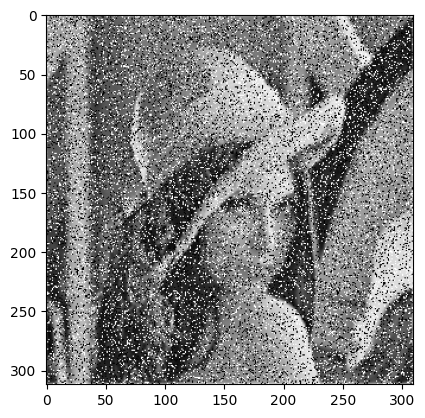

In [67]:
def salt_pepper(image, range):
        row, col = image.shape
        salt_pepper = np.random.random((row, col))*255
        pepper = salt_pepper < 0+range
        salt = salt_pepper > 255-range
        image[pepper] = 0
        image[salt] = 255
        return image

img1=salt_pepper(img,30)
plt.imshow(img1,cmap='gray')

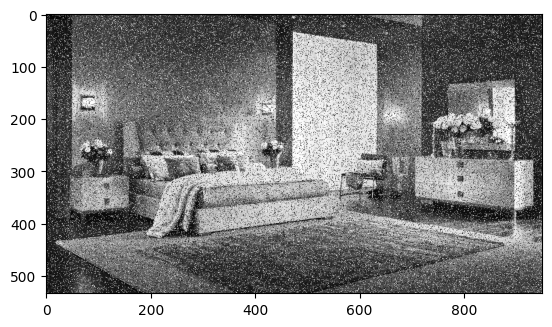

In [48]:
img = cv2.imread('../images/4.png',0)
img1=salt_pepper_noise(img)
plt.imshow(img1,cmap='gray')

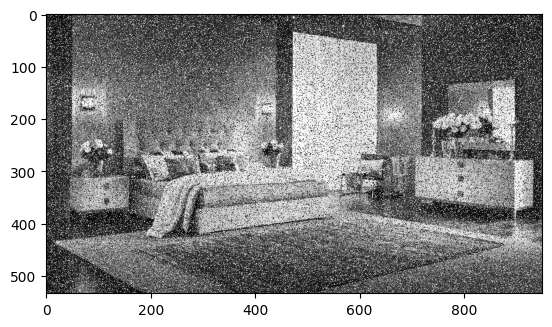

In [68]:
img = cv2.imread('../images/4.png',0)
img1=salt_pepper(img,30)
plt.imshow(img1,cmap='gray')

In [ ]:
def gaussian_noise(image, range):
        row, col = image.shape
        mean = 0
        var = range 
        sigma = var ** 0.5
        gauss = np.random.normal(mean, sigma, (row, col))
        gauss = gauss.reshape(row, col)
        noisy = image + gauss
        return noisy

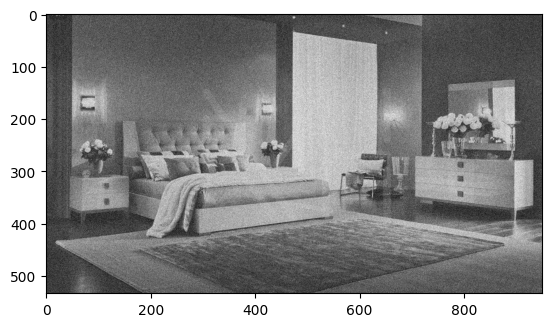

In [ ]:
img = cv2.imread('../images/4.png',0)
img1=gaussian_noise(img, 500)
plt.imshow(img1,cmap='gray')

In [ ]:
def uniform_noise(image, range):
        row, col = image.shape
        low = -range
        high = range
        noise = np.random.uniform(low, high, (row, col))
        noisy = image + noise
        return noisy

In [ ]:
def median_filter(image, kernel_size):
        row, col = image.shape
        new_image = np.zeros((row, col))
        for i in range(row):
            for j in range(col):
                new_image[i, j] = np.median(image[i:i+kernel_size, j:j+kernel_size])
        return new_image

In [ ]:
def average_filter(image, kernel_size):
        row, col = image.shape
        new_image = np.zeros((row, col))
        for i in range(row):
            for j in range(col):
                new_image[i, j] = np.mean(image[i:i+kernel_size, j:j+kernel_size])
        return new_image

In [87]:
# def getkernel(l=3, sigma=2):
   

#     ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
#     xx, yy = np.meshgrid(ax, ax)

#     kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))

#     return kernel / np.sum(kernel)

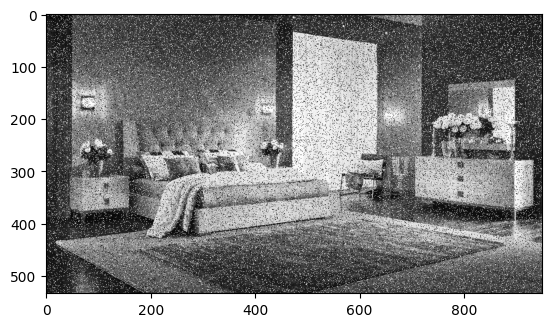

In [81]:
img = cv2.imread('../images/4.png',0)

noisedImage=salt_pepper(img, 20)
plt.imshow(noisedImage,cmap='gray')

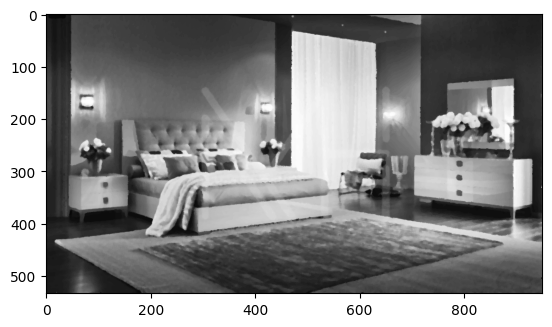

In [82]:
filteredImage=median_filter(noisedImage, 5)
plt.imshow(filteredImage,cmap='gray')

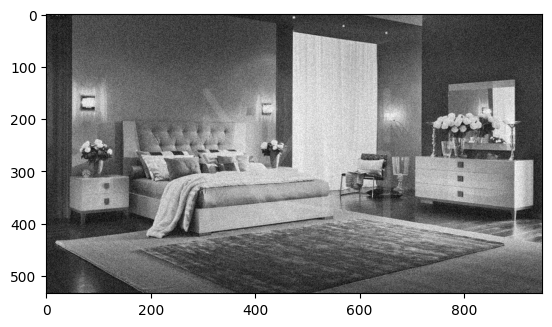

In [ ]:
plt.imshow(noisedImage,cmap='gray')

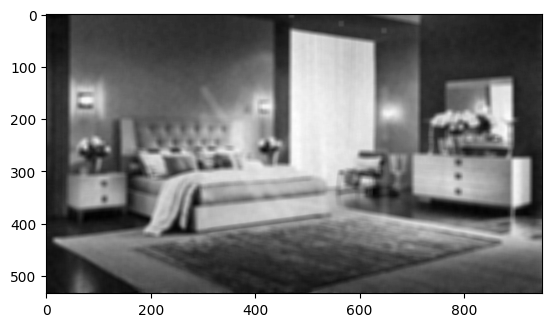

In [ ]:
filteredImage=average_filter(noisedImage, 3)
plt.imshow(filteredImage,cmap='gray')

In [173]:
def getkernel(kernel_size=3, sigma=2):
    ax = np.linspace(-(kernel_size - 1) / 2., (kernel_size - 1) / 2., kernel_size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    
    return kernel / np.sum(kernel)

In [177]:
def gaussian_filter(image, kernel_size):
        row, col = image.shape
        new_image = np.zeros((row, col))
        sigma = 2
        # get kernel
        kernel = getkernel(kernel_size, sigma)
        # apply zero padding
        image = np.pad(image, (kernel_size//2, kernel_size//2), 'constant')
        # apply filter
        for i in range(row):
            for j in range(col):
                new_image[i, j] = np.sum(image[i:i+kernel_size, j:j+kernel_size]*kernel)
        return new_image

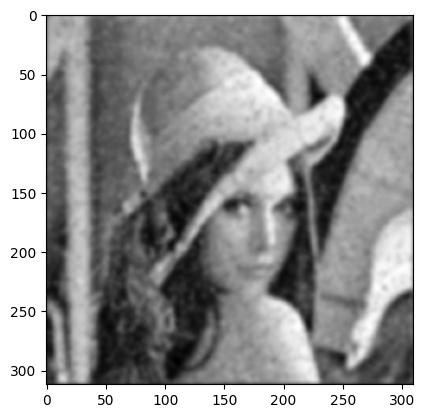

In [178]:
img = cv2.imread('../images/lena.jpg',0)
noisedImage=salt_pepper(img, 10)
filteredImage=gaussian_filter(noisedImage, 15)
plt.imshow(filteredImage,cmap='gray')